<a href="https://colab.research.google.com/github/aryanshu/Basic-ML-Projects/blob/master/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [4]:
cd '/gdrive/My Drive/Colab Notebooks/kaggle'

/gdrive/My Drive/Colab Notebooks/kaggle


In [194]:
import os
os.environ['KAGGLE_USERNAME'] = "aryanshu1" # username from the json file
os.environ['KAGGLE_KEY'] = "cf06fe7b9350c2b8ded256a661fec3d2" # key from the json file
!kaggle competitions download -c house-prices-advanced-regression-techniques # api copied from kaggle

test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 4.85MB/s]
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!unzip train.csv.

In [0]:

df=pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [0]:
data=df.copy()
feature_na=[feature for feature in data.columns if data[feature].isnull().sum()>1 ]
print('number of colummns with nan value: {}'.format(len(feature_na)))

for feature in feature_na:
  print('% of null value in {} = {}%'.format(feature,data[feature].isnull().sum()*100/len(data)))


number of colummns with nan value: 18
% of null value in LotFrontage = 17.73972602739726%
% of null value in Alley = 93.76712328767124%
% of null value in MasVnrType = 0.547945205479452%
% of null value in MasVnrArea = 0.547945205479452%
% of null value in BsmtQual = 2.5342465753424657%
% of null value in BsmtCond = 2.5342465753424657%
% of null value in BsmtExposure = 2.6027397260273974%
% of null value in BsmtFinType1 = 2.5342465753424657%
% of null value in BsmtFinType2 = 2.6027397260273974%
% of null value in FireplaceQu = 47.26027397260274%
% of null value in GarageType = 5.5479452054794525%
% of null value in GarageYrBlt = 5.5479452054794525%
% of null value in GarageFinish = 5.5479452054794525%
% of null value in GarageQual = 5.5479452054794525%
% of null value in GarageCond = 5.5479452054794525%
% of null value in PoolQC = 99.52054794520548%
% of null value in Fence = 80.75342465753425%
% of null value in MiscFeature = 96.3013698630137%


In [0]:
numeric_features = [feature for feature in data.columns if not data[feature].dtype =='O' ]
print(numeric_features)
print(len(numeric_features))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
38


In [0]:
temp_features=[feature for feature in numeric_features if 'yr' in feature.lower() or 'year' in feature.lower()]
temp_features 

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [0]:
data['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

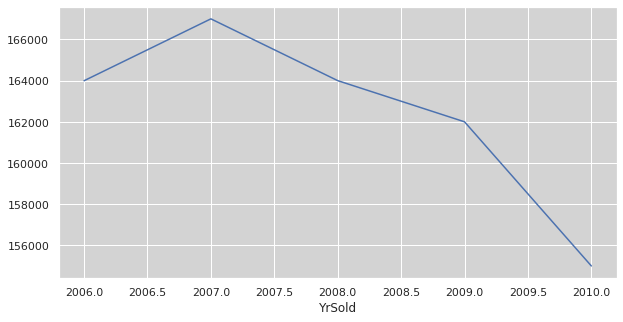

In [0]:
data=df.copy()
data.groupby(['YrSold'])['SalePrice'].median().plot(figsize=(10,5))

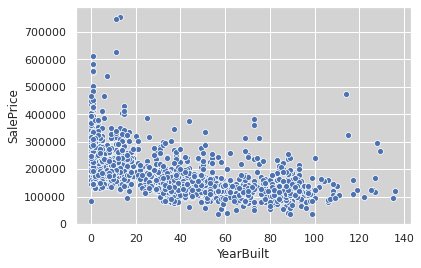

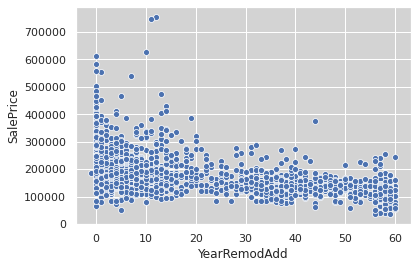

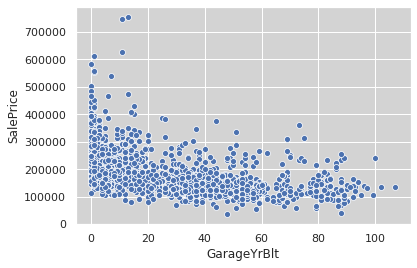

<Figure size 432x288 with 0 Axes>

In [0]:
data=df.copy()
for feature in temp_features:
  if feature != 'YrSold':
    data[feature]=data['YrSold']-data[feature]
    sns.scatterplot(x=data[feature],y=data['SalePrice'] )
    plt.figure()

In [0]:
new_numeric_features = [feature for feature in numeric_features if feature not in temp_features+['Id'] ]
print(len(new_numeric_features))
new_numeric_features

33


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [0]:
data=df.copy()
discreate_features=[feature for feature in new_numeric_features if len(data[feature].unique())<25]
print(len(discreate_features))
discreate_features

17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [0]:
continous_features = list(set(new_numeric_features)-set(discreate_features))
print(len(continous_features))
continous_features

16


['BsmtFinSF1',
 'ScreenPorch',
 'GrLivArea',
 'LotFrontage',
 'TotalBsmtSF',
 'EnclosedPorch',
 'GarageArea',
 'LotArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 'WoodDeckSF',
 'MasVnrArea',
 'OpenPorchSF',
 '2ndFlrSF',
 'SalePrice']

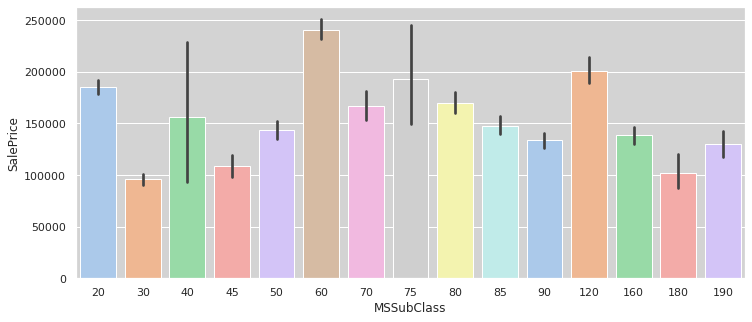

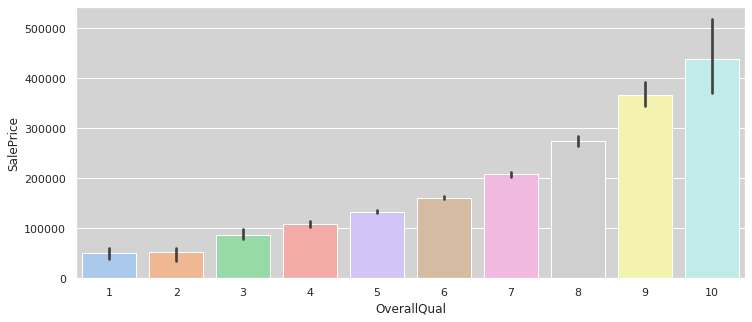

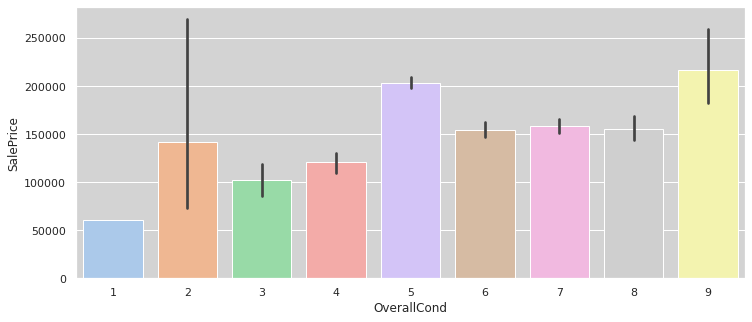

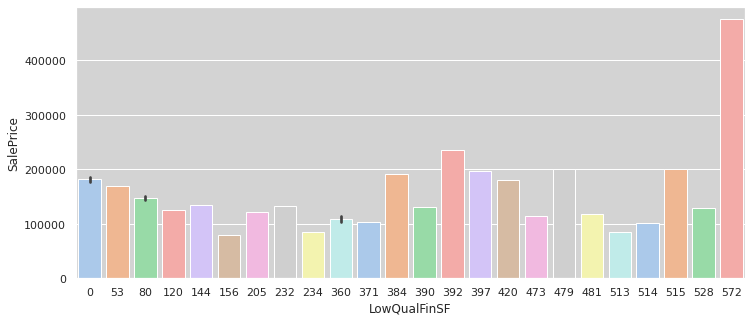

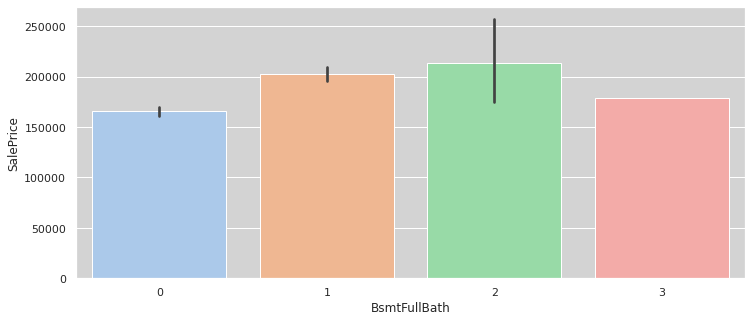

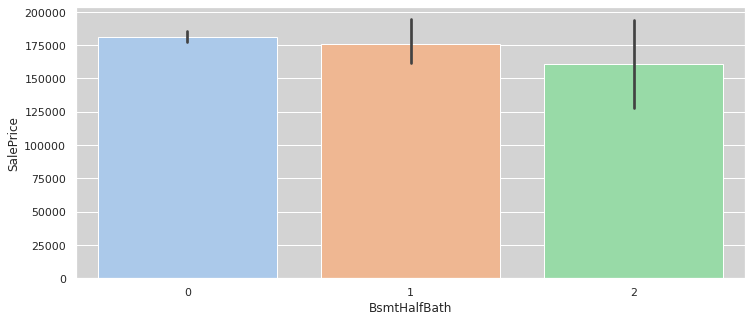

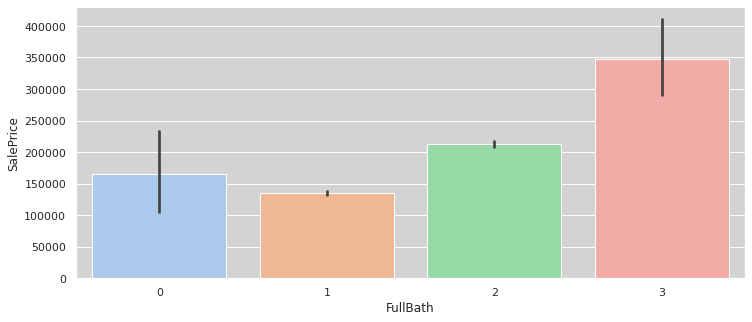

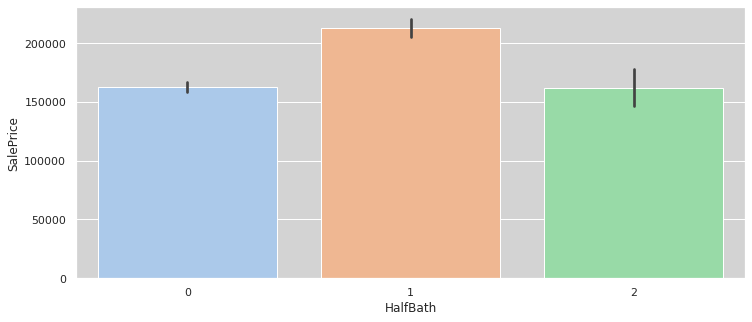

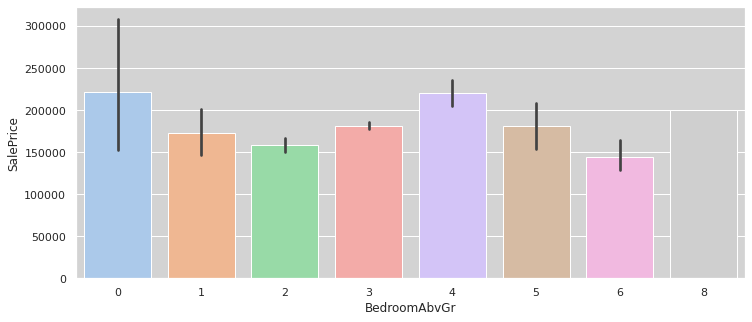

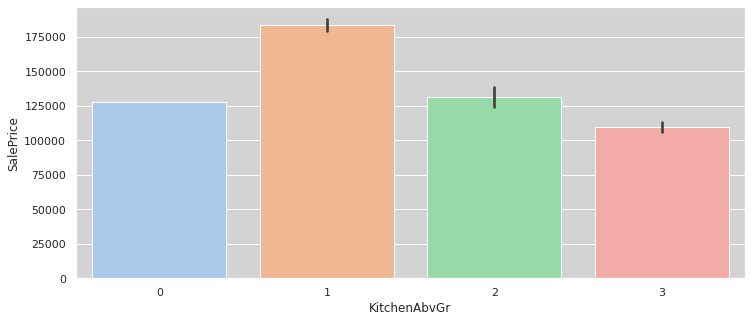

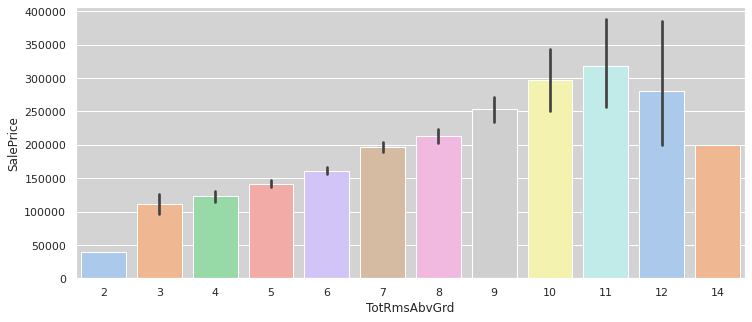

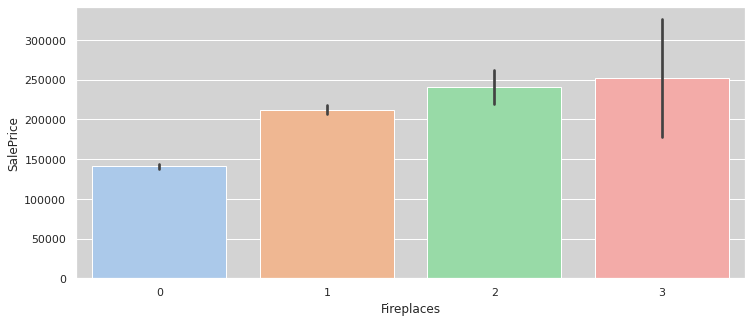

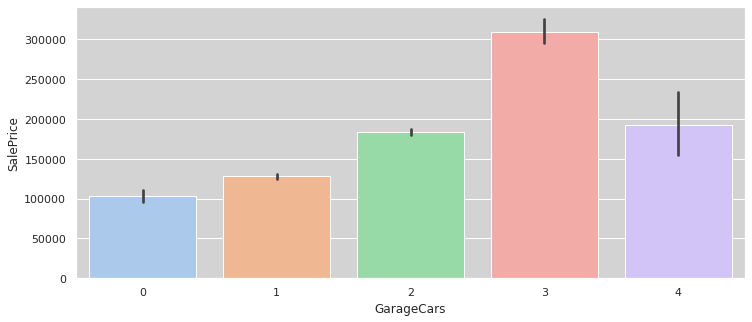

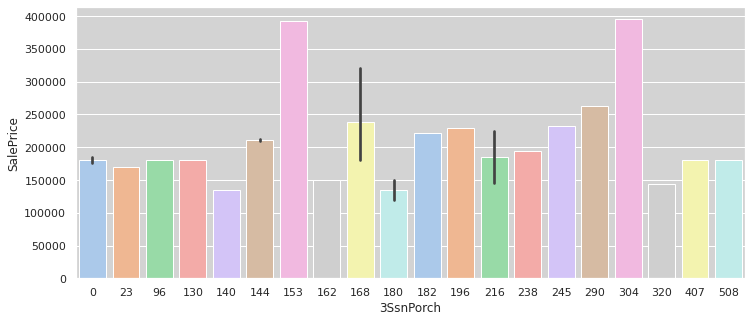

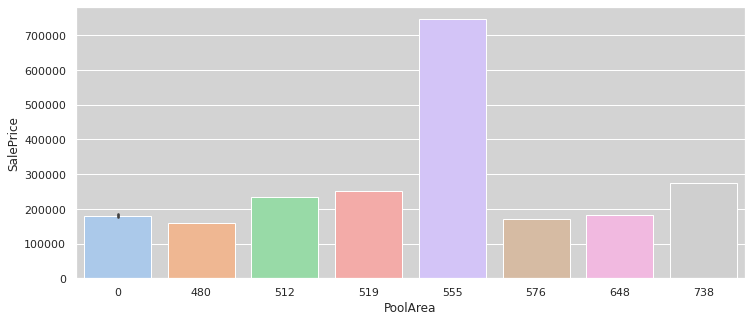

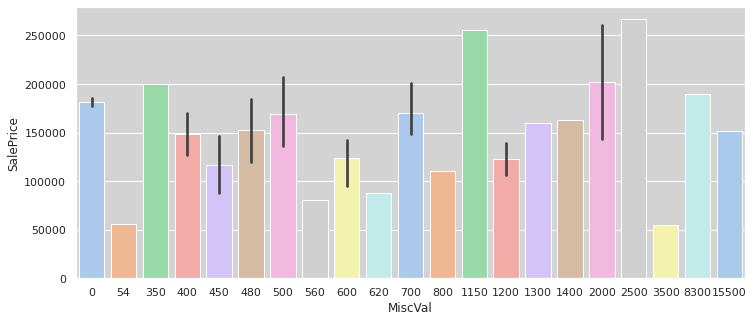

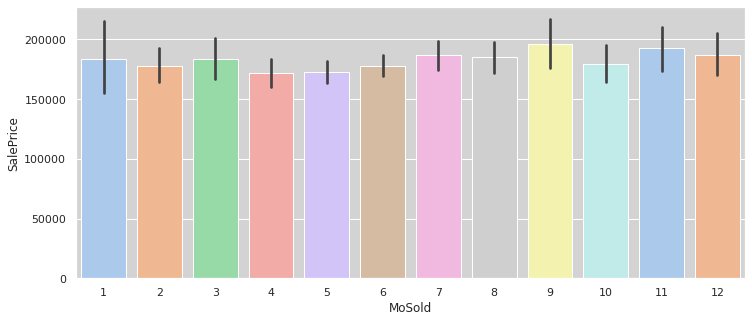

In [0]:
for feature in discreate_features:
  plt.figure(figsize=(12,5))
  sns.barplot(x=data[feature],y=data['SalePrice'] ,palette='pastel' )
  

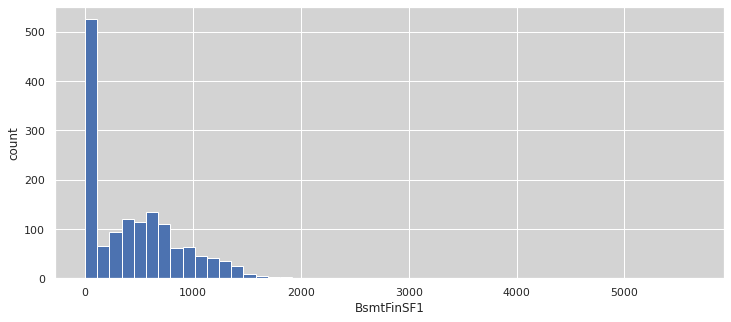

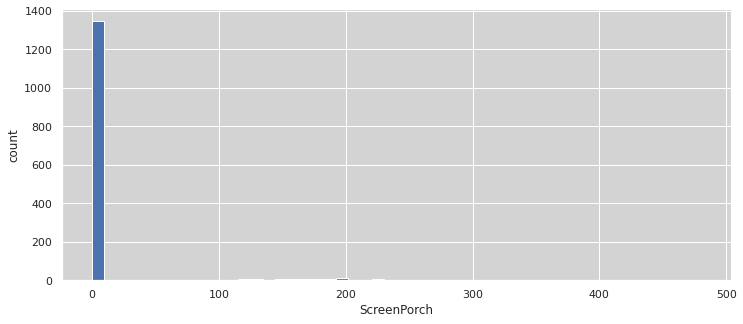

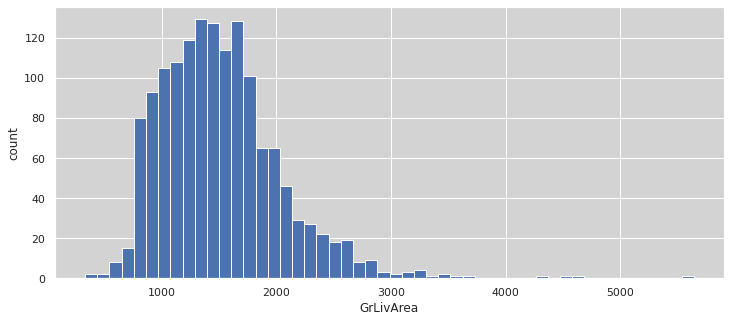

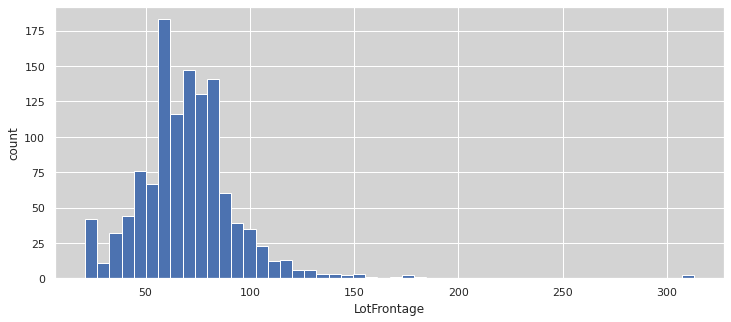

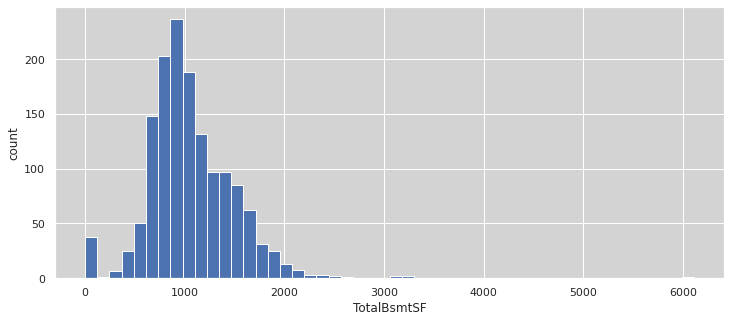

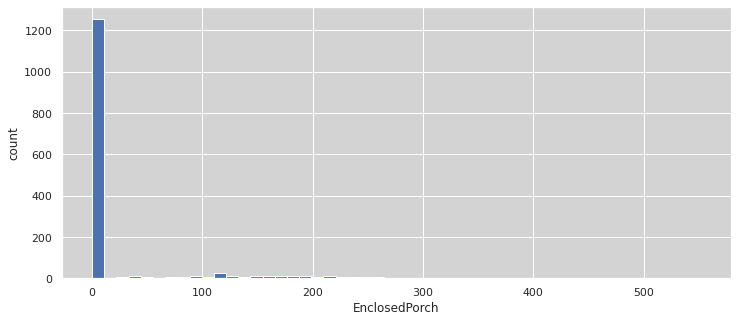

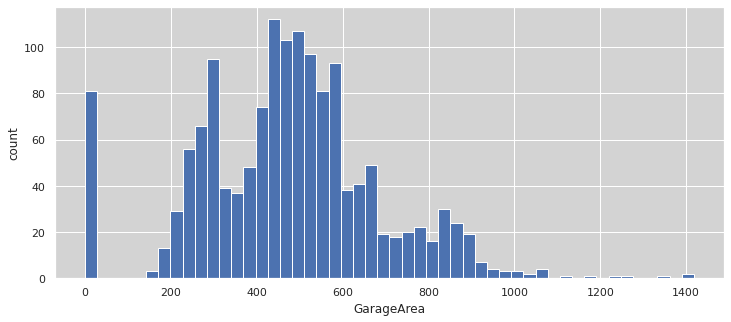

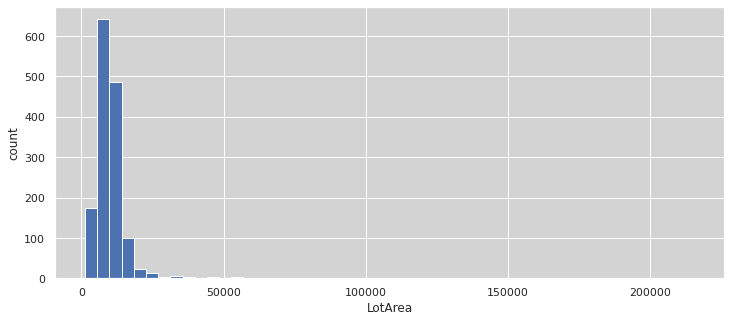

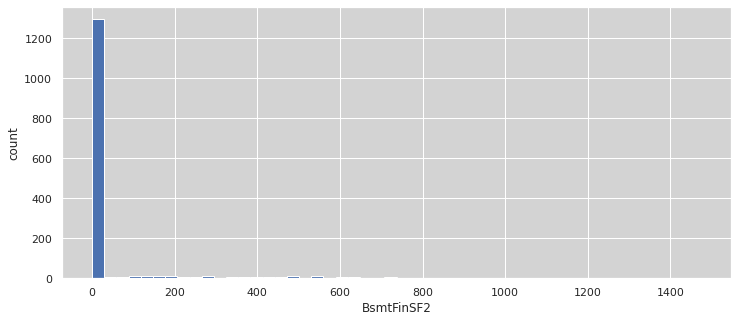

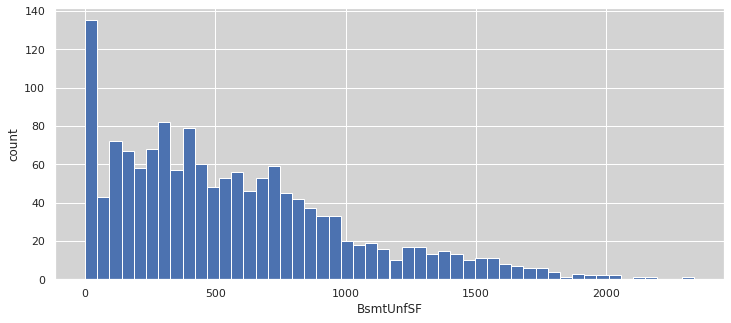

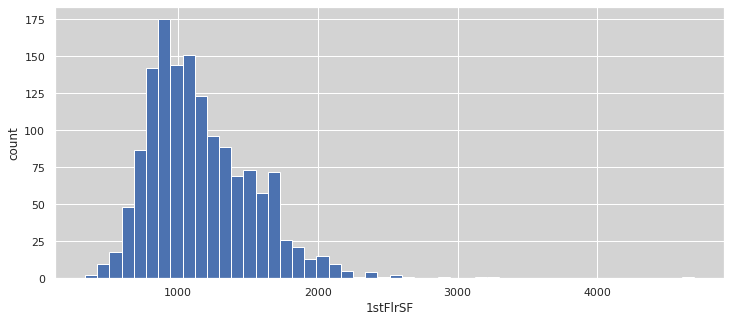

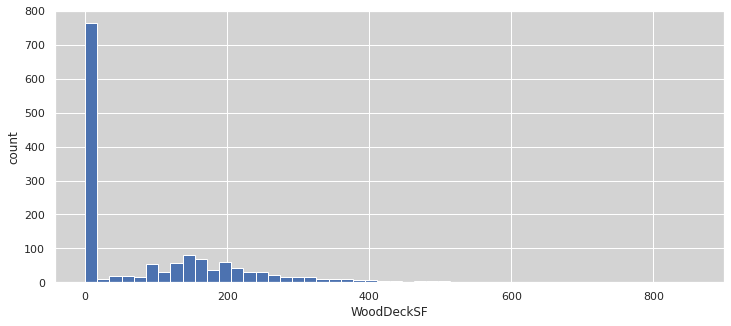

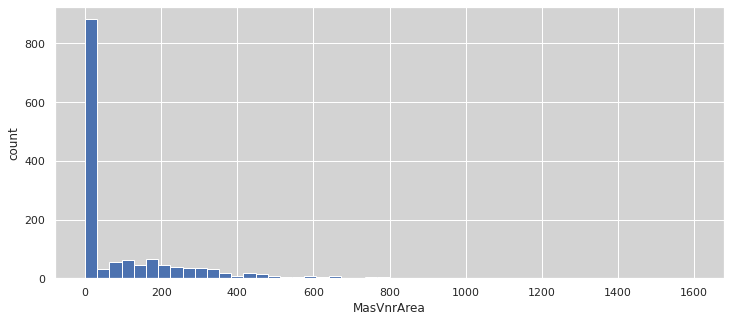

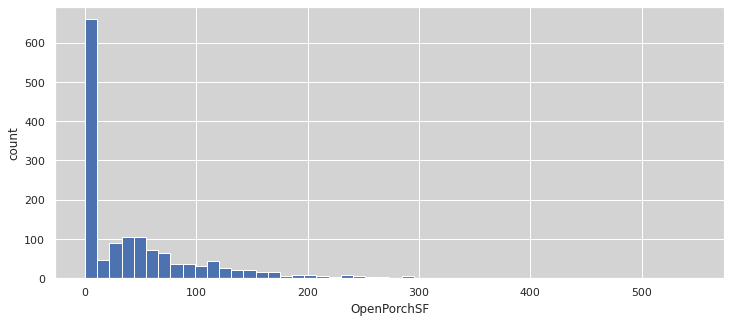

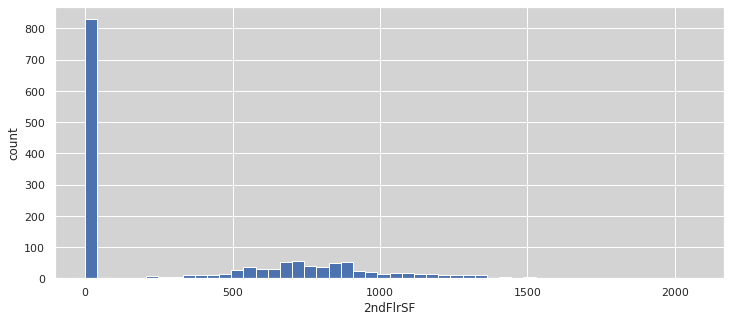

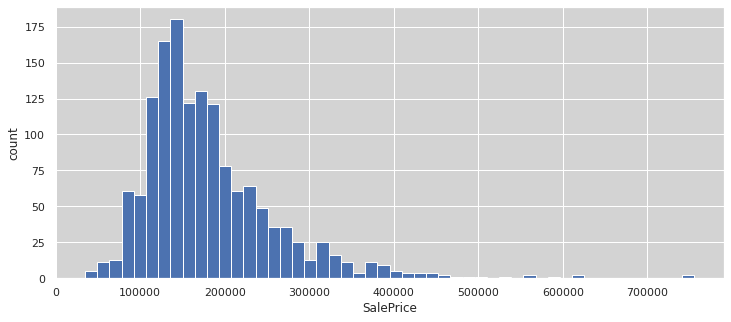

In [0]:
for feature in continous_features:
  plt.figure(figsize=(12,5))
  data[feature].hist(bins=50 )
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.show()

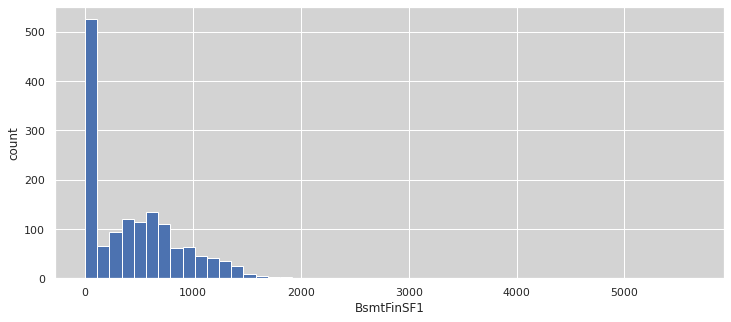

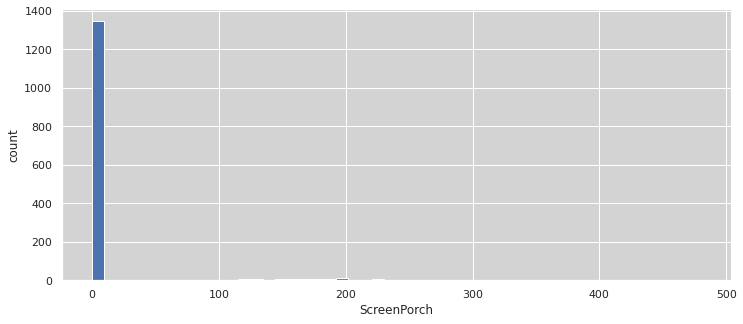

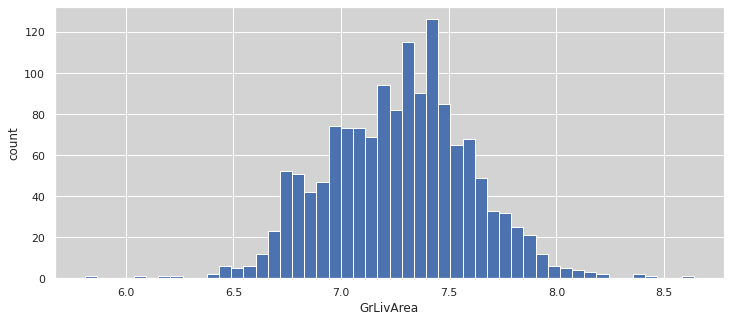

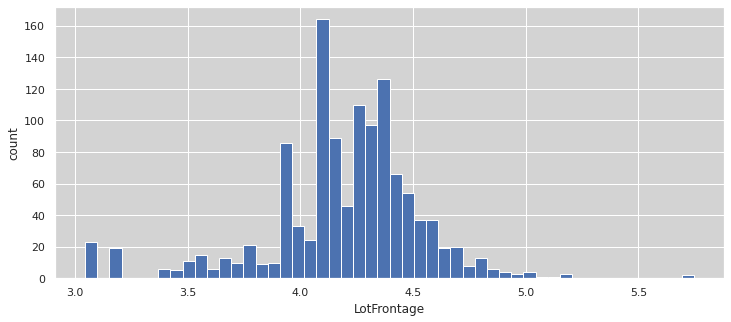

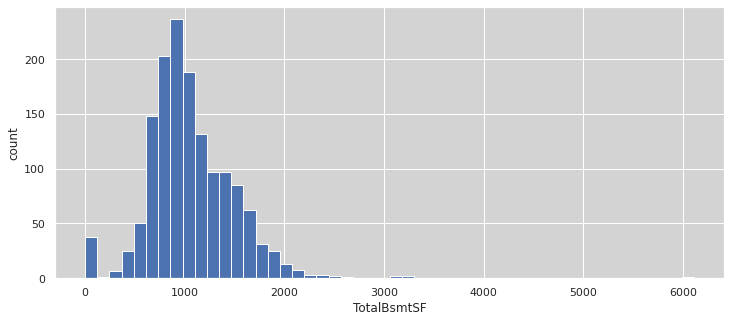

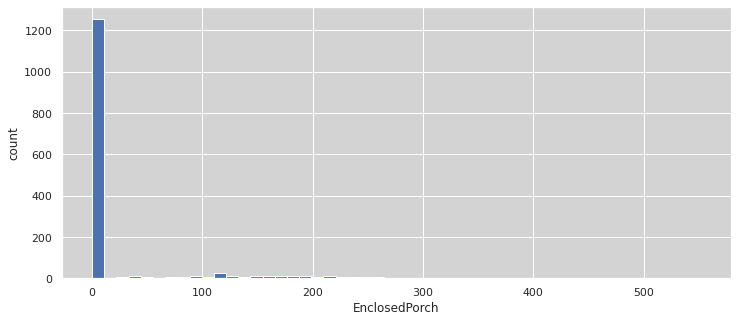

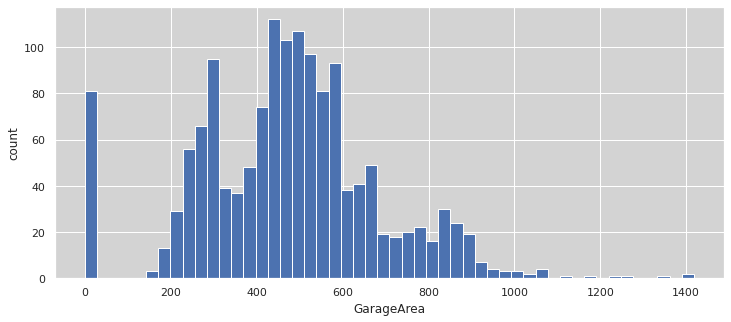

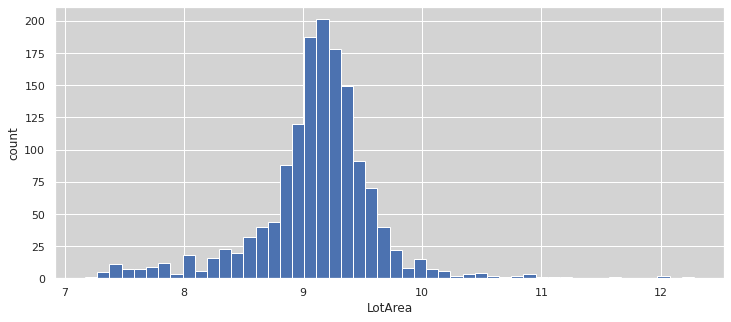

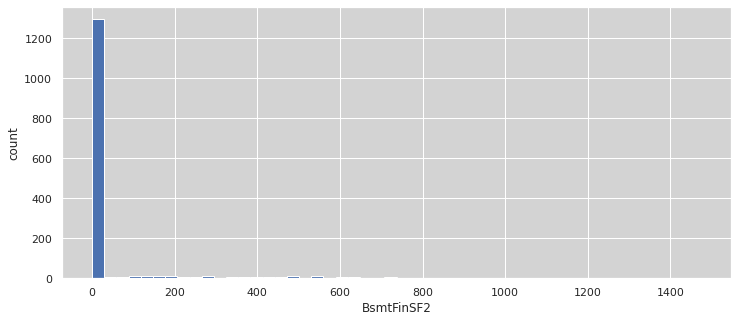

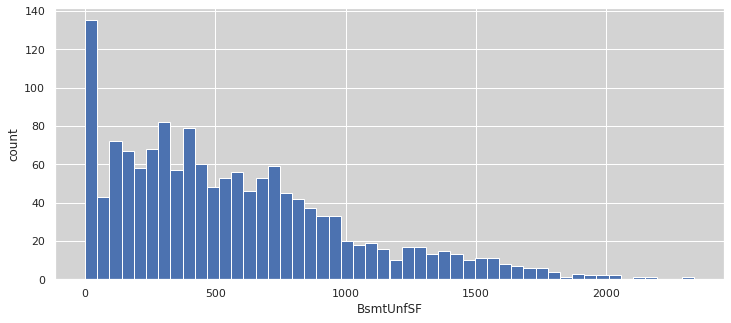

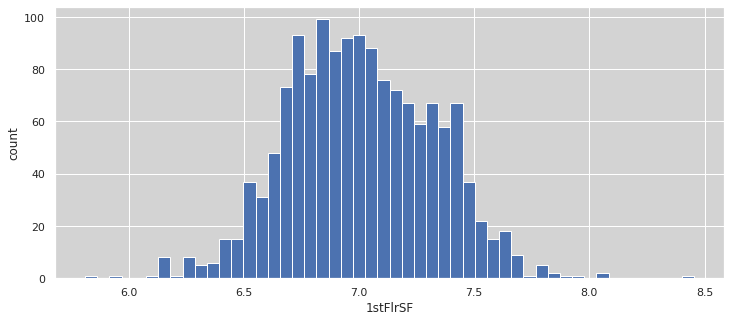

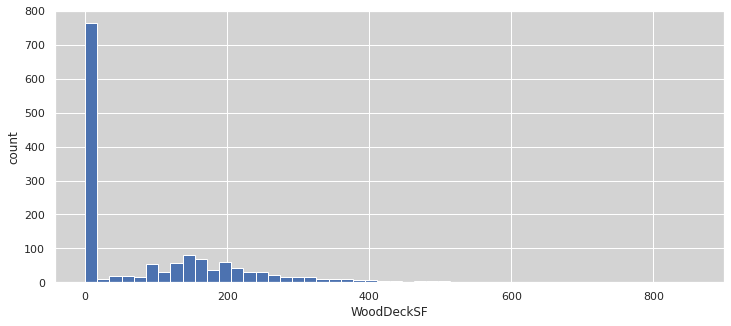

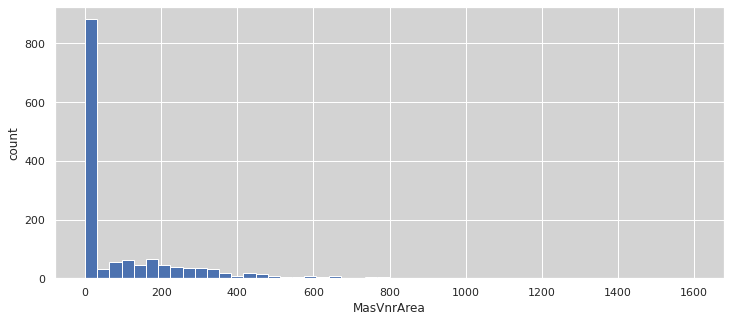

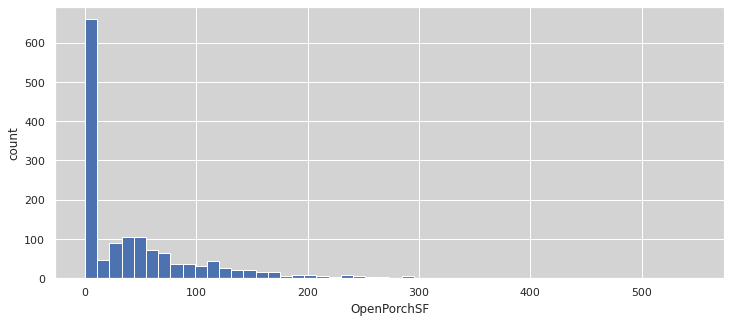

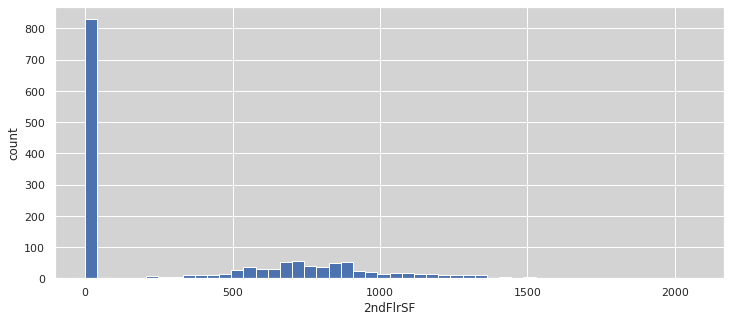

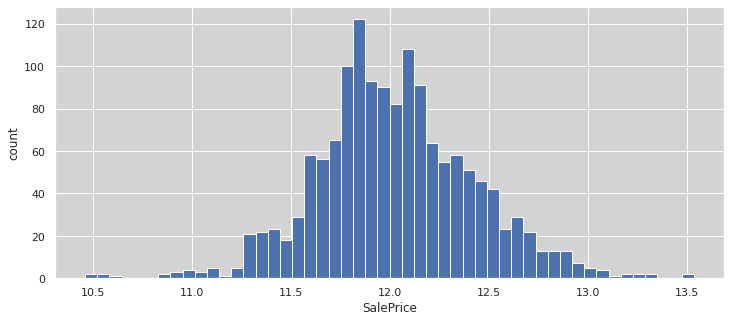

In [0]:
for feature in continous_features:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])  
  plt.figure(figsize=(12,5))
  data[feature].hist(bins=50 )
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.show()

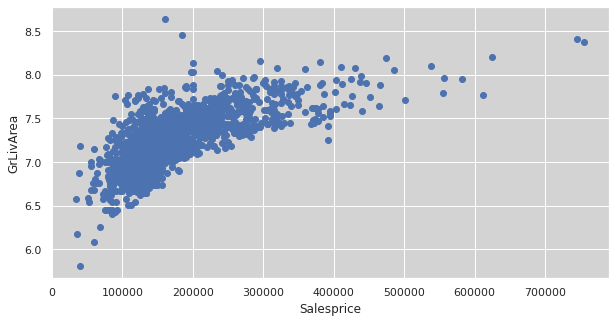

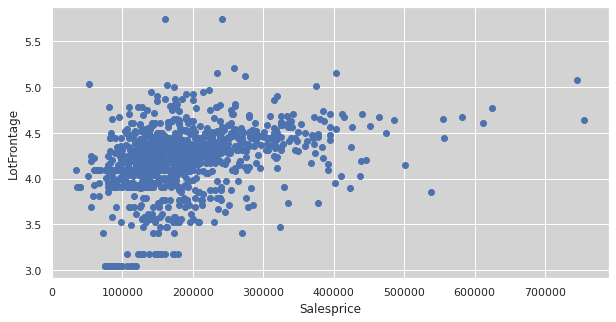

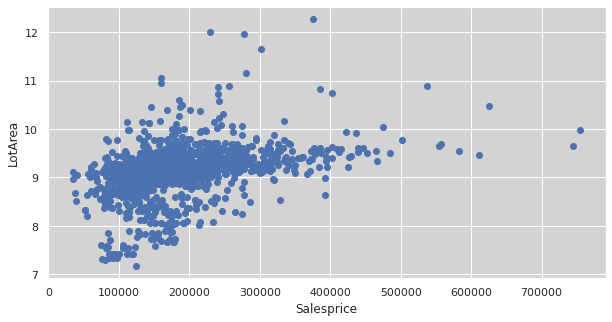

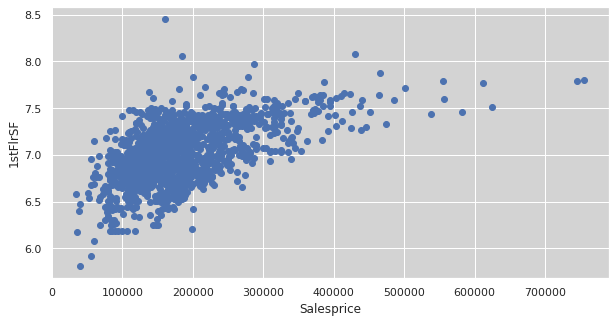

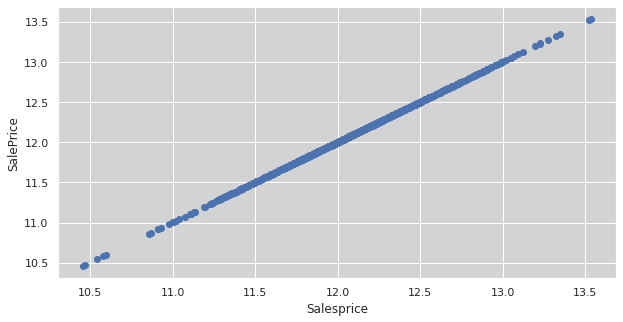

In [0]:
for feature in continous_features:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])  
    plt.figure(figsize=(10,5))
    
    plt.scatter(x=data["SalePrice"],y=data[feature])
    plt.xlabel('Salesprice')
    plt.ylabel(feature)
    plt.show()

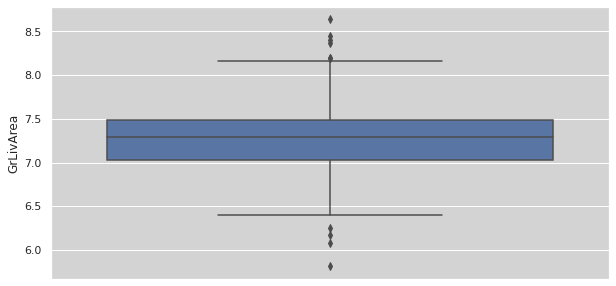

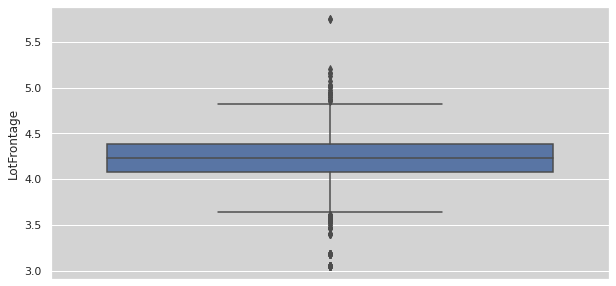

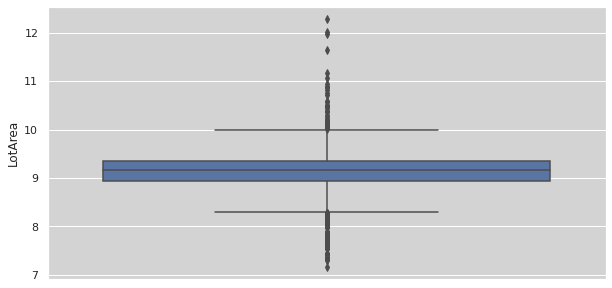

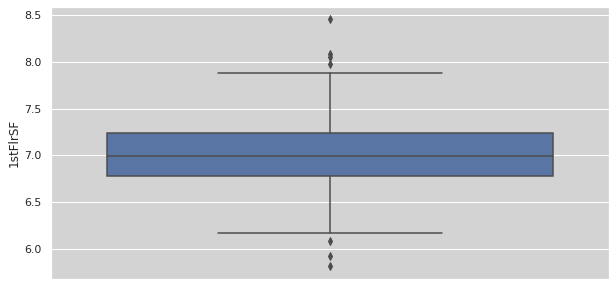

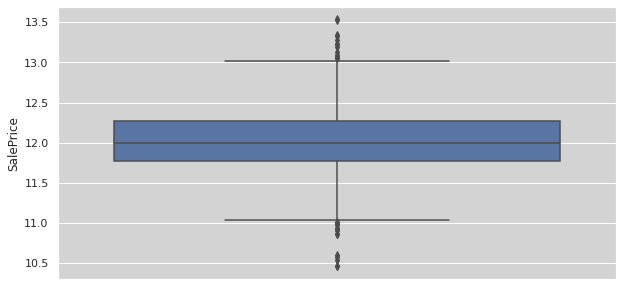

In [0]:
for feature in continous_features:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])  
    plt.figure(figsize=(10,5))

    sns.boxplot(y=feature , data=data)

    plt.show()

## Categorial Features

In [0]:
data=df.copy()
categorial_features=[feature for feature in data.columns if data[feature].dtype =='O']
categorial_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

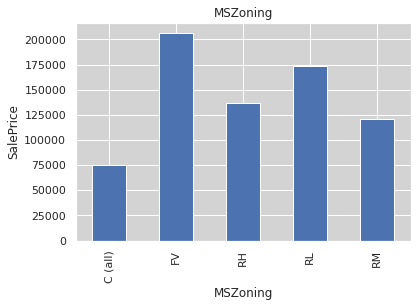

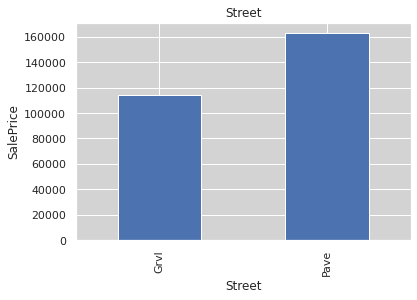

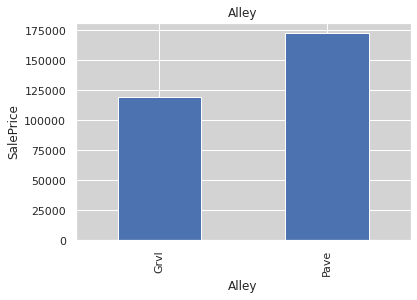

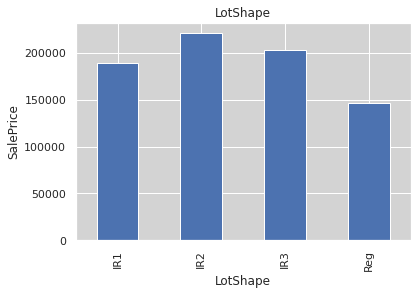

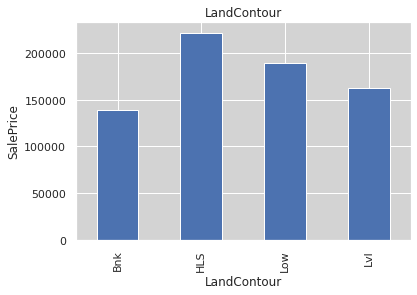

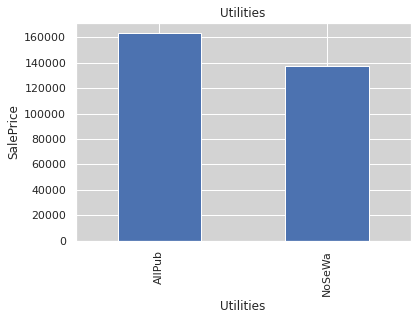

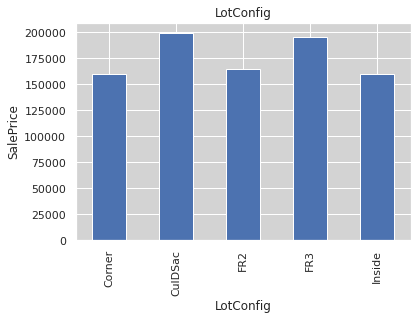

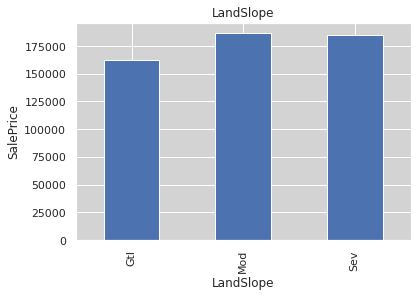

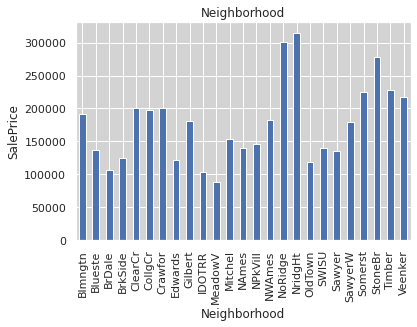

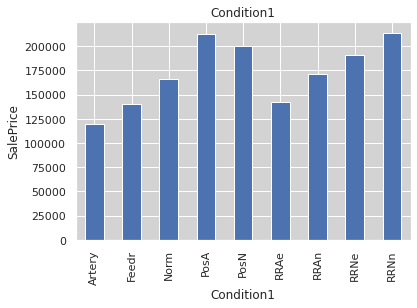

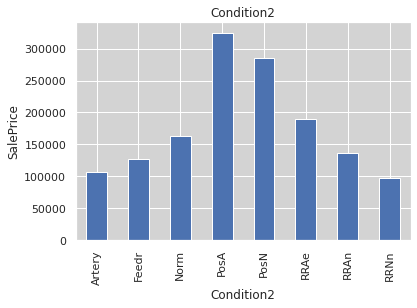

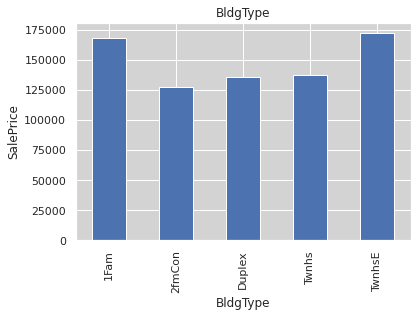

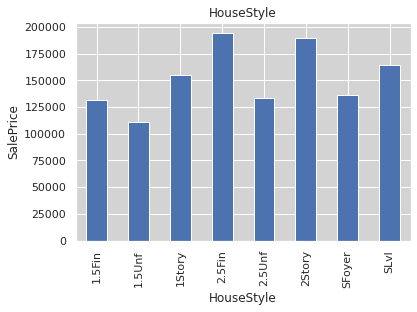

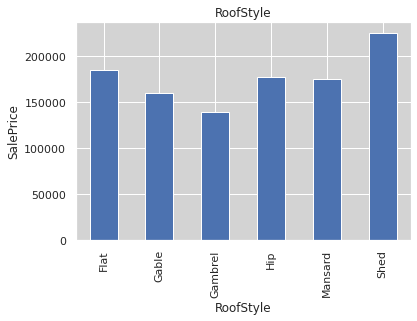

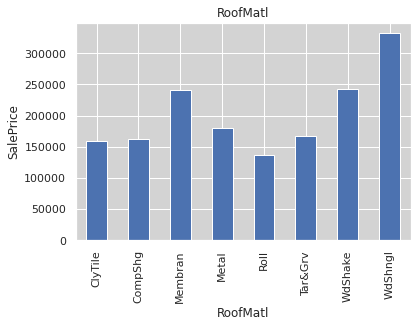

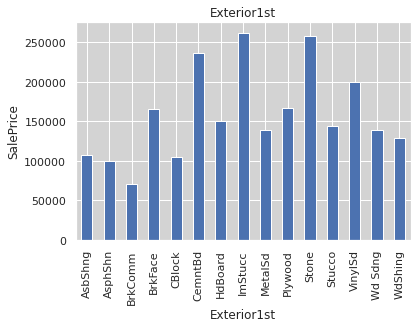

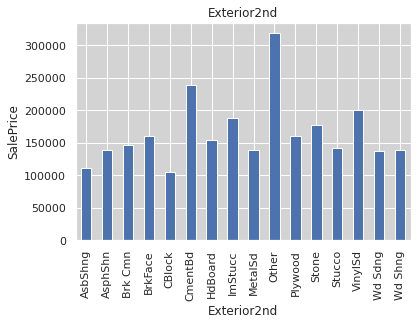

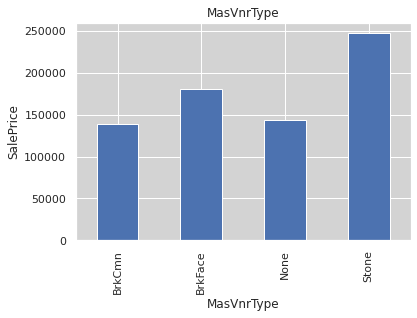

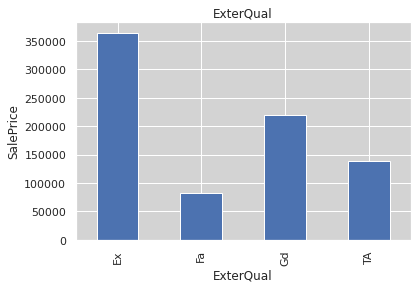

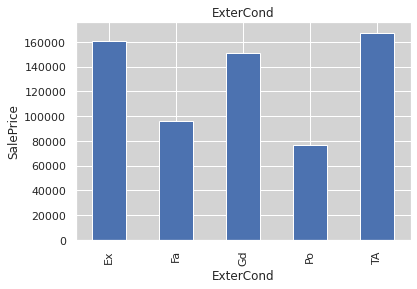

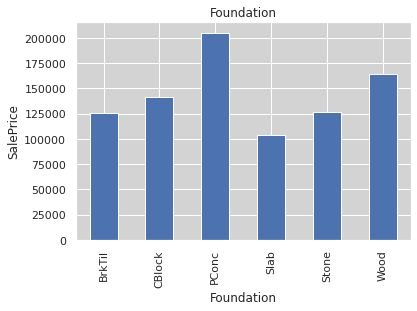

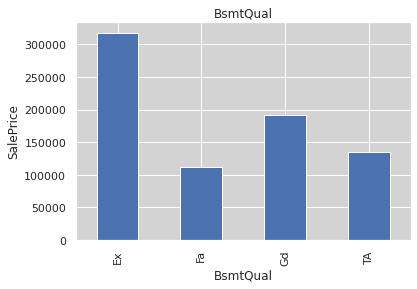

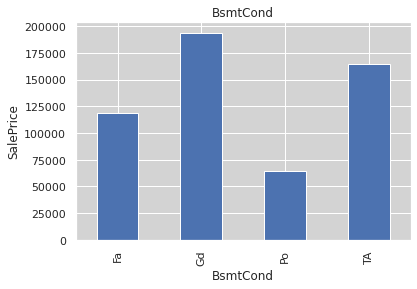

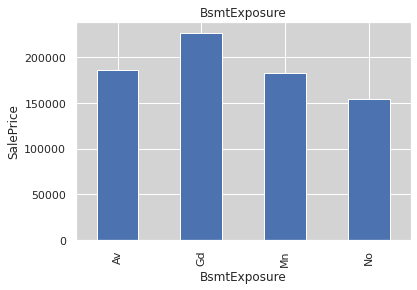

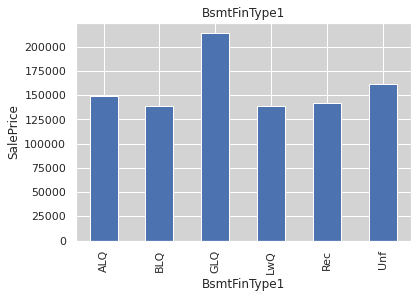

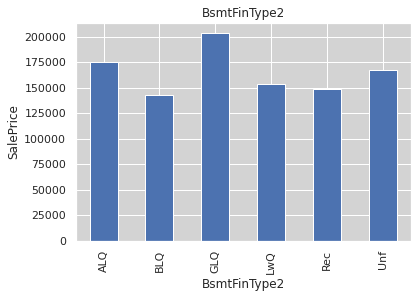

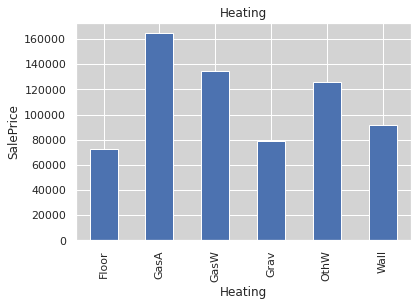

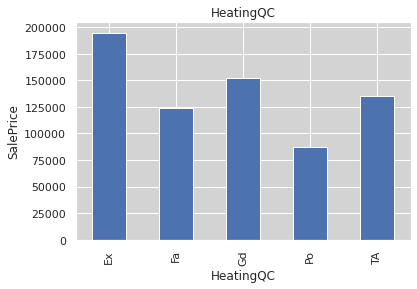

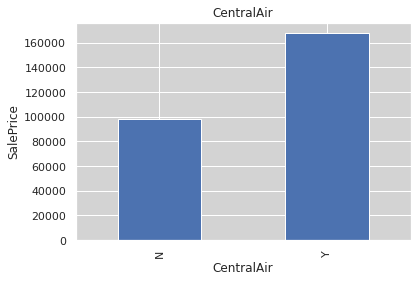

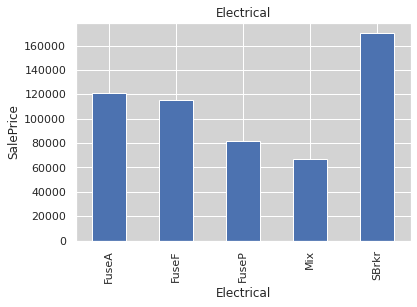

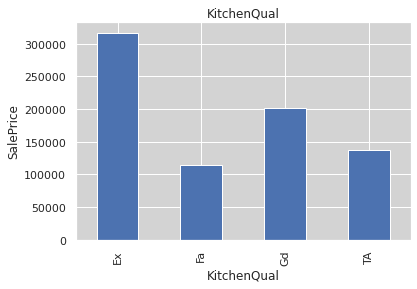

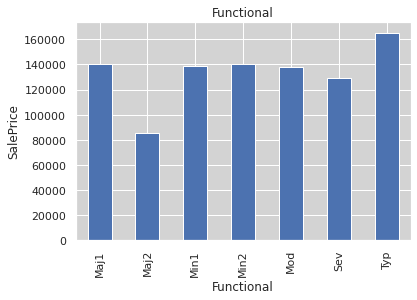

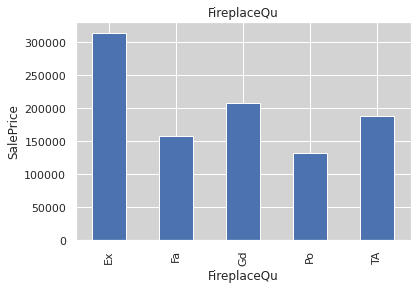

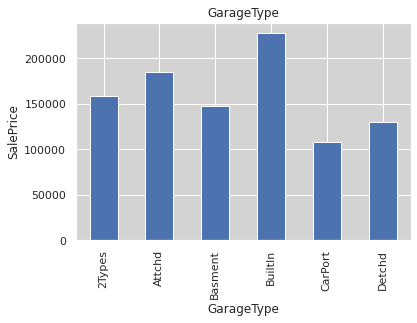

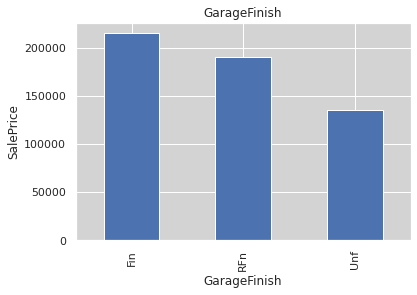

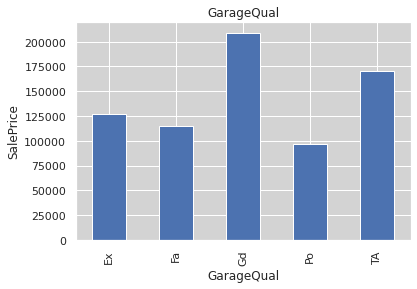

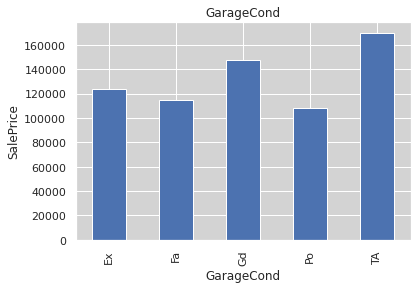

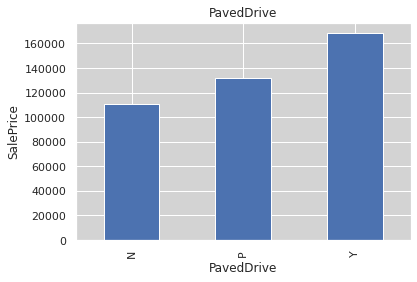

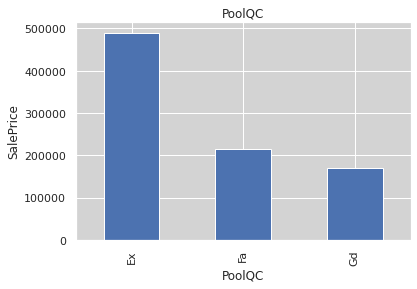

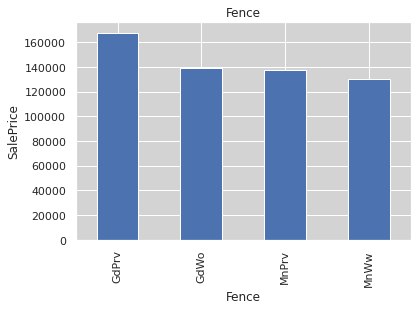

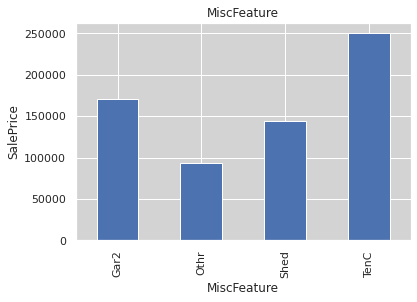

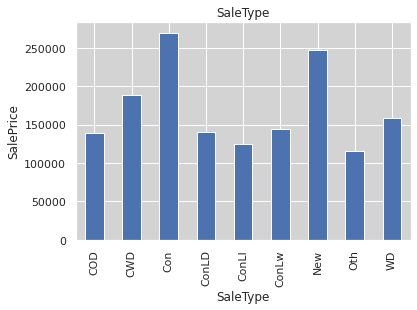

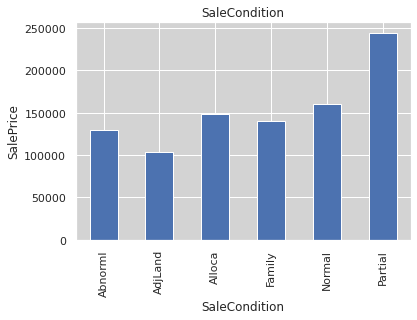

In [0]:

for feature in categorial_features:
  data=df.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

##  Feature Engineering

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
df1=train.copy()
df2=test.copy()
df2['SalePrice']=0
df=pd.concat([df1,df2],axis=0)
df.reset_index(drop=True,inplace=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
print(len(df))
print(df[-10:])

2919
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
2909  2910         180       RM  ...        WD         Normal         0
2910  2911         160       RM  ...        WD         Normal         0
2911  2912          20       RL  ...        WD         Normal         0
2912  2913         160       RM  ...        WD        Abnorml         0
2913  2914         160       RM  ...        WD         Normal         0
2914  2915         160       RM  ...        WD         Normal         0
2915  2916         160       RM  ...        WD        Abnorml         0
2916  2917          20       RL  ...        WD        Abnorml         0
2917  2918          85       RL  ...        WD         Normal         0
2918  2919          60       RL  ...        WD         Normal         0

[10 rows x 81 columns]


In [0]:
#x_train,x_test,y_train,y_test=train_test_split(df.drop(['SalePrice'],axis=1),df['SalePrice'],test_size=.05)

In [0]:
data=df.copy()
categorial_features=[feature for feature in data.columns if data[feature].dtype =='O']

In [18]:
categorial_features_nan=[feature for feature in categorial_features if data[feature].isnull().sum()>1 ]
print(len(categorial_features_nan))
categorial_features_nan

18


['MSZoning',
 'Alley',
 'Utilities',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [19]:
for feature in categorial_features_nan :
  data[feature].fillna('Missing',inplace=True)
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,...,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,...,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,...,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,...,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1

In [20]:
numeric_features = [feature for feature in data.columns if not data[feature].dtype =='O' ]
temp_features=[feature for feature in numeric_features if 'yr' in feature.lower() or 'year' in feature.lower()]
new_numeric_features=list(set(numeric_features)-set(temp_features+['Id']))
new_numeric_features

['LotFrontage',
 'TotRmsAbvGrd',
 'LotArea',
 'BsmtUnfSF',
 'PoolArea',
 'EnclosedPorch',
 'OpenPorchSF',
 'BsmtFullBath',
 'Fireplaces',
 'MSSubClass',
 'BsmtHalfBath',
 'OverallQual',
 'SalePrice',
 'MiscVal',
 'GarageArea',
 'BsmtFinSF1',
 'BedroomAbvGr',
 '3SsnPorch',
 'GarageCars',
 '1stFlrSF',
 'WoodDeckSF',
 'ScreenPorch',
 'FullBath',
 'MasVnrArea',
 'GrLivArea',
 'MoSold',
 'HalfBath',
 'KitchenAbvGr',
 'TotalBsmtSF',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 '2ndFlrSF']

In [21]:
new_numeric_features_nan = [feature for feature in new_numeric_features if data[feature].isnull().sum()>1]
for feature in new_numeric_features_nan:
  nan_value=data[feature].median()
  data[feature+'nan']=np.where(data[feature].isnull(),1,0)
  data[feature].fillna(nan_value,inplace=True)
data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,BsmtFullBathnan,BsmtHalfBathnan,MasVnrAreanan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,...,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Missing,Missing,NaN,Missing,0.0,0.0,Missing,Missing,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,6,2006,WD,Normal,0,0,0,0,0
2915,2916,160,RM,21.0,1894,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,...,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,Missing,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,Missing,Missing,Missing,0,4,2006,WD,Abnorml,0,0,0,0,0
2916,2917,20,RL,160.0,20000,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,...,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,Missing,Missing,Missing,0

In [22]:
temp_features=[feature for feature in numeric_features if 'yr' in feature.lower() or 'year' in feature.lower()]
temp_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [0]:
for feature in temp_features:
  data[feature]=data['YrSold']-data[feature]


In [24]:
data[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,0
1,31,31,31.0,0
2,7,6,7.0,0
3,91,36,8.0,0
4,8,8,8.0,0
...,...,...,...,...
2914,36,36,NaN,0
2915,36,36,36.0,0
2916,46,10,46.0,0
2917,14,14,NaN,0


In [0]:
for feature in temp_features:
  nan_value=df[feature].median()
  data[feature+'nan']=np.where(data[feature].isnull(),1,0)
  data[feature].fillna(nan_value,inplace=True)


In [26]:
gauss_numeric_feature=[feature for feature in new_numeric_features if 0 not in data[feature].unique() and feature != 'SalePrice']
gauss_numeric_feature

['LotFrontage',
 'TotRmsAbvGrd',
 'LotArea',
 'MSSubClass',
 'OverallQual',
 '1stFlrSF',
 'GrLivArea',
 'MoSold',
 'OverallCond']

In [27]:
for feature in gauss_numeric_feature:
  data[feature]=np.log(data[feature])
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,BsmtFullBathnan,BsmtHalfBathnan,MasVnrAreanan,YearBuiltnan,YearRemodAddnan,GarageYrBltnan,YrSoldnan
0,1,4.094345,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,2,1,3,1,Gd,2.079442,Typ,0,Missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,0.693147,0,WD,Normal,208500,0,0,0,0,0,0,0,0
1,2,2.995732,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1.791759,2.079442,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,2,0,3,1,TA,1.791759,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,1.609438,0,WD,Normal,181500,0,0,0,0,0,0,0,0
2,3,4.094345,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,2,1,3,1,Gd,1.791759,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,2.197225,0,WD,Normal,223500,0,0,0,0,0,0,0,0
3,4,4.248495,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1.945910,1.609438,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,1,0,3,1,Gd,1.945910,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,0.693147,0,WD,Abnorml,140000,0,0,0,0,0,0,0,0
4,5,4.094345,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.079442,1.609438,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,2,1,4,1,Gd,2.197225,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,2.484907,0,WD,Normal,250000,0,0,0,0,0,0,0,0
5,6,3.912023,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,1.609438,1.609438,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,...,1,1,1,1,TA,1.609438,Typ,0,Missing,Attchd,16.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,2.302585,0,WD,Normal,143000,0,0,0,0,0,0,0,0
6,7,2.995732,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,2.079442,1.609438,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,...,2,0,3,1,Gd,1.945910,Typ,1,Gd,Attchd,3.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,2.079442,0,WD,Normal,307000,0,0,0,0,0,0,0,0
7,8,4.094345,RL,4.219508,9.247829,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,1.945910,1.791759,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,...,2,1,3,1,TA,1.945910,Typ,2,TA,Attchd,36.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,2.397895,0,WD,Normal,200000,1,0,0,0,0,0,0,0
8,9,3.912023,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,1.945910,1.6

In [28]:
ext_gauss_feature=list(set(new_numeric_features) - set(gauss_numeric_feature)-{'SalePrice'})
ext_gauss_feature

['BsmtFinSF1',
 'BedroomAbvGr',
 'PoolArea',
 'BsmtUnfSF',
 'EnclosedPorch',
 'OpenPorchSF',
 'BsmtFullBath',
 '3SsnPorch',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'BsmtHalfBath',
 'FullBath',
 'MasVnrArea',
 'HalfBath',
 'KitchenAbvGr',
 'TotalBsmtSF',
 'MiscVal',
 'BsmtFinSF2',
 'LowQualFinSF',
 '2ndFlrSF',
 'GarageArea']

In [29]:
for feature in ext_gauss_feature:
  data[feature]=data[feature].replace([0],1)
  data[feature]=np.log(data[feature])
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,BsmtFullBathnan,BsmtHalfBathnan,MasVnrAreanan,YearBuiltnan,YearRemodAddnan,GarageYrBltnan,YrSoldnan
0,1,4.094345,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.278115,Gd,TA,PConc,Gd,TA,No,GLQ,6.559615,Unf,0.0,5.010635,6.752270,GasA,...,0.693147,0.0,1.098612,0.0,Gd,2.079442,Typ,0.0,Missing,Attchd,5.0,RFn,0.693147,6.306275,TA,TA,Y,0.000000,4.110874,0.000000,0.0,0.0,0.0,Missing,Missing,Missing,0.00000,0.693147,0,WD,Normal,208500,0,0,0,0,0,0,0,0
1,2,2.995732,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1.791759,2.079442,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.885510,Unf,0.0,5.648974,7.140453,GasA,...,0.693147,0.0,1.098612,0.0,TA,1.791759,Typ,0.0,TA,Attchd,31.0,RFn,0.693147,6.131226,TA,TA,Y,5.697093,0.000000,0.000000,0.0,0.0,0.0,Missing,Missing,Missing,0.00000,1.609438,0,WD,Normal,181500,0,0,0,0,0,0,0,0
2,3,4.094345,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.087596,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.186209,Unf,0.0,6.073045,6.824374,GasA,...,0.693147,0.0,1.098612,0.0,Gd,1.791759,Typ,0.0,TA,Attchd,7.0,RFn,0.693147,6.410175,TA,TA,Y,0.000000,3.737670,0.000000,0.0,0.0,0.0,Missing,Missing,Missing,0.00000,2.197225,0,WD,Normal,223500,0,0,0,0,0,0,0,0
3,4,4.248495,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1.945910,1.609438,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.375278,Unf,0.0,6.291569,6.628041,GasA,...,0.000000,0.0,1.098612,0.0,Gd,1.945910,Typ,0.0,Gd,Detchd,8.0,Unf,1.098612,6.464588,TA,TA,Y,0.000000,3.555348,5.605802,0.0,0.0,0.0,Missing,Missing,Missing,0.00000,0.693147,0,WD,Abnorml,140000,0,0,0,0,0,0,0,0
4,5,4.094345,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.079442,1.609438,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.857933,Gd,TA,PConc,Gd,TA,Av,GLQ,6.484635,Unf,0.0,6.194405,7.043160,GasA,...,0.693147,0.0,1.386294,0.0,Gd,2.197225,Typ,0.0,TA,Attchd,8.0,RFn,1.098612,6.728629,TA,TA,Y,5.257495,4.430817,0.000000,0.0,0.0,0.0,Missing,Missing,Missing,0.00000,2.484907,0,WD,Normal,250000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,5.075174,RM,3.044522,7.568379,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,1.386294,1.945910,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.0,6.302619,6.302619,GasA,...,0.000000,0.0,1.098612,0.0,TA,1.609438,Typ,0.0,Missing,Missing,1979.0,Missing,0.000000,0.000000,Missing,Missing,Y,0.000000,0.000000,0.000000,0.0,0.0,0.0,Missing,Missing,Missing,0.00000,1.791759,0,WD,Normal,0,0,0,0,0,0,0,1,0
2915,2916,5.075174,RM,3.044522,7.546446,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,N

In [30]:
for feature in categorial_features:
    labels_ordered=data.groupby([feature])['LotFrontage'].mode().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)
    
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,BsmtFullBathnan,BsmtHalfBathnan,MasVnrAreanan,YearBuiltnan,YearRemodAddnan,GarageYrBltnan,YrSoldnan
0,1,4.094345,4,4.174387,9.041922,0,2,1,0,0,2,0,15,3,1,4,4,1.945910,1.609438,5,5,1,0,9.0,11.0,1,5.278115,1,2,3,1,2,0,4,6.559615,1,0.0,5.010635,6.752270,2,...,0.693147,0.0,1.098612,0.0,2.0,2.079442,2,0.0,0,4,5.0,2,0.693147,6.306275,3,3,2,0.000000,4.110874,0.000000,0.0,0.0,0.0,0,0,0,0.00000,0.693147,0,4.0,1,208500,0,0,0,0,0,0,0,0
1,2,2.995732,4,4.382027,9.169518,0,2,1,0,0,0,0,12,5,1,4,5,1.791759,2.079442,31,31,1,0,1.0,3.0,0,0.000000,0,2,2,1,2,4,1,6.885510,1,0.0,5.648974,7.140453,2,...,0.693147,0.0,1.098612,0.0,0.0,1.791759,2,0.0,3,4,31.0,2,0.693147,6.131226,3,3,2,5.697093,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0.00000,1.609438,0,4.0,1,181500,0,0,0,0,0,0,0,0
2,3,4.094345,4,4.219508,9.328123,0,2,2,0,0,2,0,15,3,1,4,4,1.945910,1.609438,7,6,1,0,9.0,11.0,1,5.087596,1,2,3,1,2,1,4,6.186209,1,0.0,6.073045,6.824374,2,...,0.693147,0.0,1.098612,0.0,2.0,1.791759,2,0.0,3,4,7.0,2,0.693147,6.410175,3,3,2,0.000000,3.737670,0.000000,0.0,0.0,0.0,0,0,0,0.00000,2.197225,0,4.0,1,223500,0,0,0,0,0,0,0,0
3,4,4.248495,4,4.094345,9.164296,0,2,2,0,0,4,0,13,3,1,4,4,1.945910,1.609438,91,36,1,0,6.0,4.0,0,0.000000,0,2,0,2,3,0,1,5.375278,1,0.0,6.291569,6.628041,2,...,0.000000,0.0,1.098612,0.0,2.0,1.945910,2,0.0,4,1,8.0,1,1.098612,6.464588,3,3,2,0.000000,3.555348,5.605802,0.0,0.0,0.0,0,0,0,0.00000,0.693147,0,4.0,2,140000,0,0,0,0,0,0,0,0
4,5,4.094345,4,4.430817,9.565214,0,2,2,0,0,0,0,24,3,1,4,4,2.079442,1.609438,8,8,1,0,9.0,11.0,1,5.857933,1,2,3,1,2,2,4,6.484635,1,0.0,6.194405,7.043160,2,...,0.693147,0.0,1.386294,0.0,2.0,2.197225,2,0.0,3,4,8.0,2,1.098612,6.728629,3,3,2,5.257495,4.430817,0.000000,0.0,0.0,0.0,0,0,0,0.00000,2.484907,0,4.0,1,250000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,5.075174,0,3.044522,7.568379,0,2,1,0,0,2,0,2,3,1,0,4,1.386294,1.945910,36,36,1,0,0.0,1.0,0,0.000000,0,2,2,2,2,0,2,0.000000,1,0.0,6.302619,6.302619,2,...,0.000000,0.0,1.098612,0.0,0.0,1.609438,2,0.0,0,0,1979.0,0,0.000000,0.000000,0,0,2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0.00000,1.791759,0,4.0,1,0,0,0,0,0,0,0,1,0
2915,2916,5.075174,0,3.044522,7.546446,0,2,1,0,0,2,0,2,3,1,1,4,1.386294,1.609438,36,36,1,0,0.0,1.0,0,0.000000,0,2,2,2,2,0,3,5.529429,1,0.0,5.683580,6.302619,2,...,0.000000,0.0,1.098612,0.0,0.0,1.791759,2,0.0,0,2,36.0,1,0.000000,5.655992,3,3,2,0.000000,3.178054,0.000000,0.0,0.0,0.0,0,0,0,0.00000,1.386294,0,4.0,2,0,0,0,0,0,0,0,0,0
2916,2917,2.995732,4,5.075174,9.903488,0,2,1,0,0,2,0,17,3,1,4,5,1.609438,1.945910,46,10,1,0,9.0,11.0,0,0.000000,0,2,2,2,2,0,1,7.109879,1,0.0,0.000000,7.109879,2,...,0.000000,0.0,1.386294,0.0,0.0,1.945910,2,0.0,3,1,46.0,1,0.693147,6.356108,3,3,2,6.161207,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0.00000,2.197225,0,4.0,2,0,0,0,0,0,0,0,0,0
2917,2918,4.442651,4,4.127134,9.253496,0,2,1,0,0,2,0,17,3,1,4,1,1.609438,1.609438,14,14,1,0,5.0,4.0,0,0.000000,0,2,3,1,2,2,4,5.820083,1,0.0,6.354370,6.

## Feature Scaling

In [31]:
feature_scale=[feature for feature in data.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([data[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [33]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,BsmtFullBathnan,BsmtHalfBathnan,MasVnrAreanan,YearBuiltnan,YearRemodAddnan,GarageYrBltnan,YrSoldnan
0,1,0.487992,0.8,0.418208,0.366344,0.0,1.0,0.333333,0.0,0.0,0.5,0.0,0.625000,0.375,0.142857,1.0,0.571429,0.845098,0.732487,0.043796,0.112903,0.2,0.0,0.642857,0.733333,0.25,0.715409,0.333333,0.5,0.6,0.25,0.50,0.00,0.666667,0.759360,0.166667,0.0,0.646017,0.774549,0.4,...,0.0,0.5,0.0,0.528321,0.0,0.666667,0.688020,0.285714,0.0,0.0,0.666667,0.094080,0.666667,0.430677,0.863260,0.6,0.6,1.0,0.000000,0.621979,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.278943,0.0,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.000000,0.8,0.495064,0.391317,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.500000,0.625,0.142857,1.0,0.714286,0.778151,0.946395,0.233577,0.532258,0.2,0.0,0.071429,0.200000,0.00,0.000000,0.000000,0.5,0.4,0.25,0.50,1.00,0.166667,0.797086,0.166667,0.0,0.728318,0.819077,0.4,...,0.0,0.5,0.0,0.528321,0.0,0.000000,0.545243,0.285714,0.0,0.6,0.666667,0.106012,0.666667,0.430677,0.839298,0.6,0.6,1.0,0.784591,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.647685,0.0,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.487992,0.8,0.434909,0.422359,0.0,1.0,0.666667,0.0,0.0,0.5,0.0,0.625000,0.375,0.142857,1.0,0.571429,0.845098,0.732487,0.058394,0.129032,0.2,0.0,0.642857,0.733333,0.25,0.689586,0.333333,0.5,0.6,0.25,0.50,0.25,0.666667,0.716133,0.166667,0.0,0.782993,0.782820,0.4,...,0.0,0.5,0.0,0.528321,0.0,0.666667,0.545243,0.285714,0.0,0.6,0.666667,0.094998,0.666667,0.430677,0.877483,0.6,0.6,1.0,0.000000,0.565513,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.884228,0.0,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.556464,0.8,0.388581,0.390295,0.0,1.0,0.666667,0.0,0.0,1.0,0.0,0.541667,0.375,0.142857,1.0,0.571429,0.845098,0.732487,0.671533,0.612903,0.2,0.0,0.428571,0.266667,0.00,0.000000,0.000000,0.5,0.0,0.50,0.75,0.00,0.166667,0.622258,0.166667,0.0,0.811167,0.760299,0.4,...,0.0,0.0,0.0,0.528321,0.0,0.666667,0.621749,0.285714,0.0,0.8,0.166667,0.095457,0.333333,0.682606,0.884931,0.6,0.6,1.0,0.000000,0.537927,0.810124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.278943,0.0,0.5,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.487992,0.8,0.513123,0.468761,0.0,1.0,0.666667,0.0,0.0,0.0,0.0,1.000000,0.375,0.142857,1.0,0.571429,0.903090,0.732487,0.065693,0.161290,0.2,0.0,0.642857,0.733333,0.25,0.793999,0.333333,0.5,0.6,0.25,0.50,0.50,0.666667,0.750680,0.166667,0.0,0.798640,0.807917,0.4,...,0.0,0.5,0.0,0.666667,0.0,0.666667,0.746476,0.285714,0.0,0.6,0.666667,0.095457,0.666667,0.682606,0.921075,0.6,0.6,1.0,0.724051,0.670386,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data.to_csv('X_train.csv',index=False)

In [38]:
salePrice=df['SalePrice'][:len(df1)]
salePrice=pd.DataFrame(salePrice)
salePrice

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [0]:
train_data=data[:len(df1)]
test_data=data[len(df1):]

In [0]:
x_train,x_test,y_train,y_test=train_test_split(train_data,salePrice,test_size=.05)

In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 1195 to 598
Data columns (total 88 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1387 non-null   int64  
 1   MSSubClass       1387 non-null   float64
 2   MSZoning         1387 non-null   float64
 3   LotFrontage      1387 non-null   float64
 4   LotArea          1387 non-null   float64
 5   Street           1387 non-null   float64
 6   Alley            1387 non-null   float64
 7   LotShape         1387 non-null   float64
 8   LandContour      1387 non-null   float64
 9   Utilities        1387 non-null   float64
 10  LotConfig        1387 non-null   float64
 11  LandSlope        1387 non-null   float64
 12  Neighborhood     1387 non-null   float64
 13  Condition1       1387 non-null   float64
 14  Condition2       1387 non-null   float64
 15  BldgType         1387 non-null   float64
 16  HouseStyle       1387 non-null   float64
 17  OverallQual 

In [43]:
x_train.fillna(1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score as cvs

In [46]:
Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)
scores=cvs(Linear_model,x_train,y_train,cv=10)
print("accuracy of linearRegressor "+str(scores.mean()))

accuracy of linearRegressor 0.8009537083747821


In [47]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor()
xgb_model.fit(x_train,y_train)


[18:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [48]:
xgb_model.score(x_test,y_test)

0.8277448868414488

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = np.sqrt(np.square(np.asarray(np.log(y_predicted)-np.log(y_test)).sum())/float(len(y_predicted)))
rms

In [0]:
y_predicted=xgb_model.predict(test_data)

In [0]:
submission=pd.read_csv('sample_submission.csv')

In [57]:
submission['SalePrice']=y_predicted
submission

,Id,SalePrice
0,1461,129314.460938
1,1462,154277.531250
2,1463,181029.593750
3,1464,187464.171875
4,1465,203202.375000
...,...,...
1454,2915,82387.609375
1455,2916,85355.671875
1456,2917,175831.406250
1457,2918,127555.640625


In [0]:
submission.to_csv('submission_new5.csv')

In [0]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [97]:
feature_sel_model = SelectFromModel(Lasso(alpha=1, random_state=0)) 
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=1, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [98]:

feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False,  True, False])

In [0]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

In [0]:
X_train=X_train[selected_feat]

In [127]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor()
xgb_model.fit(x_train,y_train)

[11:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [128]:
xgb_model.score(x_test,y_test)

0.8805284819620913

In [176]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 88 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1459 non-null   int64  
 1   MSSubClass       1459 non-null   float64
 2   MSZoning         1459 non-null   float64
 3   LotFrontage      1459 non-null   float64
 4   LotArea          1459 non-null   float64
 5   Street           1459 non-null   float64
 6   Alley            1459 non-null   float64
 7   LotShape         1459 non-null   float64
 8   LandContour      1459 non-null   float64
 9   Utilities        1459 non-null   float64
 10  LotConfig        1459 non-null   float64
 11  LandSlope        1459 non-null   float64
 12  Neighborhood     1459 non-null   float64
 13  Condition1       1459 non-null   float64
 14  Condition2       1459 non-null   float64
 15  BldgType         1459 non-null   float64
 16  HouseStyle       1459 non-null   float64
 17  OverallQual   

In [0]:
y_predicted=xgb_model.predict(x_train.drop(['BsmtHalfBathnan', 'BsmtFullBathnan'],axis=1))

In [145]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = np.sqrt(np.square(np.asarray(np.log(y_predicted)-np.log(y_test)).sum())/float(len(y_predicted)))
rms

0.007913455647295382

In [0]:
import pickle as pkl
file='xgb_model.pkl'
pkl.dump(xgb_model,open(file,'wb'))


In [0]:
df=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')



In [182]:
set(df.columns)-set(df2.columns)

{'SalePrice'}

In [0]:
df2_=df2.copy()

In [0]:
df1_=df.copy()

In [0]:
df2_['Saleprice']=1

In [188]:
df1_.columns==df2_.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False])

In [191]:
y_predicted

array([120775.76, 170429.16, 161121.25, ..., 183637.38, 133798.55,
       231363.  ], dtype=float32)

In [204]:
submission=pd.read_csv('sample_submission.csv')
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


0       120775.757812
1       170429.156250
2       161121.250000
3       182823.312500
4       188632.343750
            ...      
1454     73943.804688
1455     81725.742188
1456    183637.375000
1457    133798.546875
1458    231363.000000
Name: SalePrice, Length: 1459, dtype: float32

,SalePrice
Id,
1461,120775.757812
1462,170429.156250
1463,161121.250000
1464,182823.312500
1465,188632.343750
...,...
2915,73943.804688
2916,81725.742188
2917,183637.375000


In [59]:
# Install required libraries
!pip install --upgrade pip
!pip install kaggle --upgrade

# Add your PRIVATE credentials (you get them from https://www.kaggle.com > 'Account' > "Create new API token" )
# Do not use "!export KAGGLE_USERNAME= ..." OR "" around your credential
%env KAGGLE_USERNAME=aryanshu1
%env KAGGLE_KEY=cf06fe7b9350c2b8ded256a661fec3d2

# Verify
!export -p | grep KAGGLE_

# Submit (you can find this command from the section "My submissions" within the competition page)
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission_new4.csv -m "first try"

# View results
!kaggle competitions submissions -c house-prices-advanced-regression-techniques

     |████████████████████████████████| 1.5MB 2.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)
env: KAGGLE_USERNAME=aryanshu1
env: KAGGLE_KEY=cf06fe7b9350c2b8ded256a661fec3d2
declare -x KAGGLE_KEY="cf06fe7b9350c2b8ded256a661fec3d2"
declare -x KAGGLE_USERNAME="aryanshu1"
100% 21.2k/21.2k [00:06<00:00, 3.13kB/s]
Successfully submitted to House Prices: Advanced Regression TechniquesWarning: Looks like you're using an outdated API Version, please consider updating (server 1.5.6 / client 1.5.4)
fileName             date                 description  status    publicScore  privateScore  
-------------------  -------------------  -----------  --------  -----------  ------------  
submission_new4.csv  2020-05-12 18:17:38  first try    complete  0.17289      None          
submission_new4.csv  2020-05-12 12:59:12  first try    complete 